__Homework 2__
-

__Due Date:__ 2022-10-16 at 8:30 AM PT


__Name:__ Virginia


For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

# Preparation

1. Create a 'data' folder in the root directory of your repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [183]:
#pip install numpy
#pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\vzhang\\code\\Virginia-ML-2024\\Homework'

In [155]:
df_nri = pd.read_csv('../data/raw/NRI_Table_Counties.csv', dtype={"STCOFIPS": str})
print(df_nri.head())

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1    01001       58764  ...  15.784587             Very Low   
1           3    01003      231365  ...  56.205509  Relatively Moderate   
2           5    01005       25160  ...  18.632002       Relatively Low   
3           7    01007       22239  ...  13.308573             Very Low   
4           9    01009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687716e-07  7.410082e-09  8.725777e-06      10.

__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [156]:
afreq_cols = [col for col in df_nri.columns if col.endswith('_AFREQ')]
riskr_cols = [col for col in df_nri.columns if col.endswith('_RISKR')]

keep_cols = ['STCOFIPS'] + afreq_cols + riskr_cols

df_nri_sub = df_nri[keep_cols]

print(df_nri_sub.head())

  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    01001         NaN         NaN         0.0   25.969774    0.000431   
1    01003         NaN    3.684142         0.0   12.353442    0.000338   
2    01005         NaN         NaN         0.0   43.956953    0.000227   
3    01007         NaN         NaN         0.0   28.894501    0.000790   
4    01009         NaN         NaN         0.0   28.152598    0.000817   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...           ISTM_RISKR  \
0    2.806764    0.371517    0.080450    0.402025  ...             Very Low   
1    1.529256    0.939761    0.248233    0.191996  ...       Relatively Low   
2    1.908785    0.371517    0.116398    0.393288  ...             Very Low   
3    3.447868    0.371517    0.066724    0.413094  ...       Relatively Low   
4    5.101344    0.371517    0.039238    0.509665  ...  Relatively Moderate   

       LNDS_RISKR           LTNG_RISKR           RFLD_RISKR  \
0  Relatively Low

__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [157]:
hazard_types = [col.replace('_AFREQ', '') for col in afreq_cols]

# Empty list to store N/A counts
na_vals = []

# Get counts of N/A for each col
for hazard in hazard_types:
    afreq_col = f"{hazard}_AFREQ"
    riskr_col = f"{hazard}_RISKR"
    
    afreq_na = df_nri_sub[afreq_col].isnull().sum()
    riskr_na = df_nri_sub[riskr_col].isnull().sum()
    
    na_vals.append({
        'Hazard': hazard,
        'Missing_AFREQ': afreq_na,
        'Missing_RISKR': riskr_na
    })

df_na = pd.DataFrame(na_vals)

print(df_na)
print(f'sum of missing values = {df_nri_sub.isnull().sum().sum()}') 

   Hazard  Missing_AFREQ  Missing_RISKR
0    AVLN           3023              0
1    CFLD           2646              0
2    CWAV              0              0
3    DRGT              7              0
4    ERQK              0              0
5    HAIL              7              0
6    HWAV              0              0
7    HRCN            918              0
8    ISTM            229              0
9    LNDS             40              0
10   LTNG            123              0
11   RFLD              0              0
12   SWND              7              0
13   TRND              7              0
14   TSUN           3103              0
15   VLCN           3125              0
16   WFIR             88              0
17   WNTW              0              0
sum of missing values = 13323


__4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [158]:
# For each column, create new column flagging whether value is N/A
for col in df_nri_sub.columns:
    df_nri_sub["na_"+col] = df_nri_sub[col].isnull()

# Cross-tabs
cross_tab = pd.crosstab(df_nri_sub['AVLN_RISKR'], df_nri_sub['na_AVLN_AFREQ'], dropna=False)
cross_tab

C:\Users\vzhang\AppData\Local\Temp\ipykernel_29300\1955316297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nri_sub["na_"+col] = df_nri_sub[col].isnull()
C:\Users\vzhang\AppData\Local\Temp\ipykernel_29300\1955316297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nri_sub["na_"+col] = df_nri_sub[col].isnull()
C:\Users\vzhang\AppData\Local\Temp\ipykernel_29300\1955316297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

na_AVLN_AFREQ,False,True
AVLN_RISKR,,
Not Applicable,0,3023
Relatively High,15,0
Relatively Low,52,0
Relatively Moderate,33,0
Very High,9,0
Very Low,99,0


__Observations:__

AVLN_AFREQ = annualized frequency of avalanches
AVLN_RISKR = avalanche Hazard Type Risk Index Rating

All counties have non-values for AVLN_RISKR (avalanche risk index), but 3023 counties (the vast majority of counties) have missing values for AVLN_AFREQ (avalanche frequency). This makes sense, since most regions in the US don't have snowy mountains. 

Among the counties that DO have avalanches, most are low-risk. 99 counties have very low risk avalanches, 52 have relatively low, etc. Only 9 counties' avalanches are very high risk.



__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [162]:
# Replace M/A values of _AFREQ columns as 0
df_nri_sub[afreq_cols] = df_nri_sub[afreq_cols].replace({np.nan:0})
print(df_nri_sub.head())

  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    01001         0.0    0.000000         0.0   25.969774    0.000431   
1    01003         0.0    3.684142         0.0   12.353442    0.000338   
2    01005         0.0    0.000000         0.0   43.956953    0.000227   
3    01007         0.0    0.000000         0.0   28.894501    0.000790   
4    01009         0.0    0.000000         0.0   28.152598    0.000817   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...  na_ISTM_RISKR  \
0    2.806764    0.371517    0.080450    0.402025  ...          False   
1    1.529256    0.939761    0.248233    0.191996  ...          False   
2    1.908785    0.371517    0.116398    0.393288  ...          False   
3    3.447868    0.371517    0.066724    0.413094  ...          False   
4    5.101344    0.371517    0.039238    0.509665  ...          False   

   na_LNDS_RISKR  na_LTNG_RISKR  na_RFLD_RISKR  na_SWND_RISKR  na_TRND_RISKR  \
0          False          False     

C:\Users\vzhang\AppData\Local\Temp\ipykernel_29300\2257034435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nri_sub[afreq_cols] = df_nri_sub[afreq_cols].replace({np.nan:0})


## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__
__1. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`

In [164]:
df_svi = pd.read_csv("../data/raw/SVI_2022_US_county.csv", dtype={'FIPS': str})

# Step 2: Subset the SVI data to include the required columns
keep_cols = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI',
    'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65',
    'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE',
    'EP_CROWD', 'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN',
    'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE'
]

# Subset the dataframe
df_svi_sub = df_svi[keep_cols]   
print(df_svi_sub.head())

   ST    STATE ST_ABBR  STCNTY          COUNTY   FIPS  \
0   1  Alabama      AL    1001  Autauga County  01001   
1   1  Alabama      AL    1003  Baldwin County  01003   
2   1  Alabama      AL    1005  Barbour County  01005   
3   1  Alabama      AL    1007     Bibb County  01007   
4   1  Alabama      AL    1009   Blount County  01009   

                  LOCATION    AREA_SQMI  E_TOTPOP  EP_POV150  ...  EP_NOVEH  \
0  Autauga County, Alabama   594.454786     58761       20.2  ...       4.0   
1  Baldwin County, Alabama  1589.861817    233420       18.3  ...       2.3   
2  Barbour County, Alabama   885.007619     24877       37.7  ...      11.7   
3     Bibb County, Alabama   622.469286     22251       29.0  ...       7.5   
4   Blount County, Alabama   644.890376     59077       22.9  ...       4.8   

   EP_GROUPQ  EP_NOINT  EP_AFAM  EP_HISP  EP_ASIAN  EP_AIAN  EP_NHPI  \
0        0.9      10.9     19.6      3.2       1.1      0.1      0.0   
1        1.5      10.9      8.3      4

__2. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__

In [166]:
# Get counts of N/A values for each col
na_vals = df_svi_sub.isnull().sum()

# Create DF with N/A values
df_svi_na = pd.DataFrame({'Column': na_vals.index, 'Missing_Values': na_vals.values})

# Print the counts of N/A values for all cols
print(df_svi_na)
print(df_svi_na.sum())

          Column  Missing_Values
0             ST               0
1          STATE               0
2        ST_ABBR               0
3         STCNTY               0
4         COUNTY               0
5           FIPS               0
6       LOCATION               0
7      AREA_SQMI               0
8       E_TOTPOP               0
9      EP_POV150               0
10      EP_UNEMP               0
11      EP_HBURD               0
12     EP_NOHSDP               0
13    EP_UNINSUR               0
14      EP_AGE65               0
15      EP_AGE17               0
16     EP_DISABL               0
17     EP_SNGPNT               0
18     EP_LIMENG               0
19     EP_MINRTY               0
20      EP_MUNIT               0
21     EP_MOBILE               0
22      EP_CROWD               0
23      EP_NOVEH               0
24     EP_GROUPQ               0
25      EP_NOINT               0
26       EP_AFAM               0
27       EP_HISP               0
28      EP_ASIAN               0
29       E

__Observations:__

No missing values in any columns

## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [169]:
# Get FIPS codes from both DFs 
nri_fips = set(df_nri_sub['STCOFIPS'])
svi_fips = set(df_svi_sub['FIPS'])

# Get FIPS that are in one DF but not in other
fips_only_in_nri = nri_fips - svi_fips
fips_only_in_svi = svi_fips - nri_fips

# Print the above 2 lists
print("FIPS Only in NRI: ", fips_only_in_nri)
print("FIPS Only in SVI: ", fips_only_in_svi)

FIPS Only in NRI:  {'72017', '72117', '72153', '72055', '72123', '72027', '72097', '72031', '72115', '72089', '72069', '72127', '72001', '72011', '72087', '72063', '72111', '72033', '72003', '72113', '72137', '72041', '72075', '72081', '72015', '72009', '72149', '09007', '09003', '72045', '72037', '72085', '72039', '60050', '72054', '72145', '72119', '72019', '72021', '72129', '72083', '72035', '72103', '72073', '72143', '72139', '09015', '72079', '72023', '72061', '72091', '72067', '69120', '72125', '72059', '72121', '72051', '09013', '72029', '78010', '72135', '72105', '72131', '09005', '72151', '72101', '72077', '72005', '72057', '66010', '72099', '72047', '72053', '72013', '78020', '09011', '72093', '72147', '72007', '09001', '60010', '72065', '69110', '09009', '72107', '78030', '60020', '69100', '72025', '72133', '72071', '72095', '72109', '72049', '72043', '72141'}
FIPS Only in SVI:  {'09190', '09170', '09180', '09140', '09130', '09150', '09160', '09120', '09110'}


__Observations:__

NRI has FIPS for US territories including Puerto Rico (72-), Virgin Islands (78-), Guam (66-), but SVI does not. This means that FEMA has natural disaster hazard data for US Territories, while the CDC (source of the SVI data) does not have data on social vulnerability those areas.

The NRI is only missing a couple FIPS in Connecticut (starting with 09).

But both sources are missing some FIPS in Connecticut.

The inconsistencies might be due to different data collection methods between FEMA vs. CDC, or different data reporting practices between the 50 US states vs. US Territories.

When analyzing the merged dataset, we'll only be able to analyze the relationship between natural disaster hazards and social vulnerability for the FIPS that are in common. I.e., we can't analyze the relationship for US Territories and a few FIPS in Connecticut. We don't have any data on social vulnerability for US Territories, so any findings we have on social vulnerability in the 50 US states cannot be generalized to US Territories.

__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [171]:
df_merge = pd.merge(df_nri_sub, df_svi_sub, left_on='STCOFIPS', right_on='FIPS', how='outer')
df_merge.shape  #dimensions

(3240, 107)

__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [172]:
# Get counts of N/A values for each col
na_vals = df_merge.isnull().sum()

# Create DF with N/A values
df_merge_na = pd.DataFrame({'Column': na_vals.index, 'Missing_Values': na_vals.values})

# Print the counts of N/A values for all cols
print(df_merge_na)
print(df_merge_na.sum())

           Column  Missing_Values
0        STCOFIPS               9
1      AVLN_AFREQ               9
2      CFLD_AFREQ               9
3      CWAV_AFREQ               9
4      DRGT_AFREQ               9
..            ...             ...
102      EP_ASIAN              96
103       EP_AIAN              96
104       EP_NHPI              96
105    EP_TWOMORE              96
106  EP_OTHERRACE              96

[107 rows x 2 columns]
Column            STCOFIPSAVLN_AFREQCFLD_AFREQCWAV_AFREQDRGT_AFR...
Missing_Values                                                 3834
dtype: object


## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

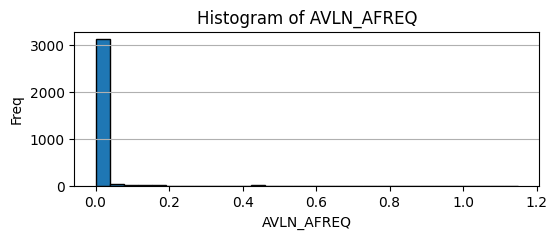

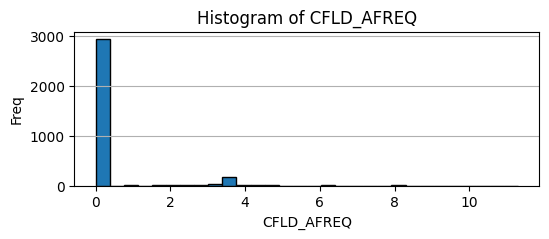

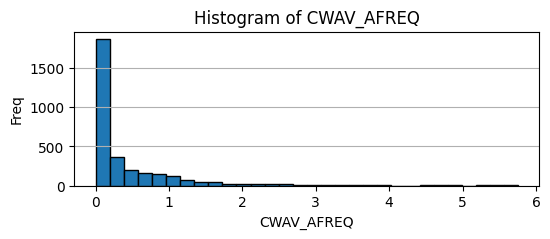

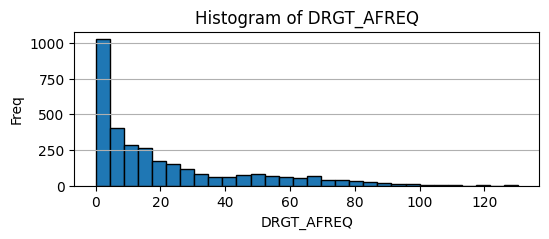

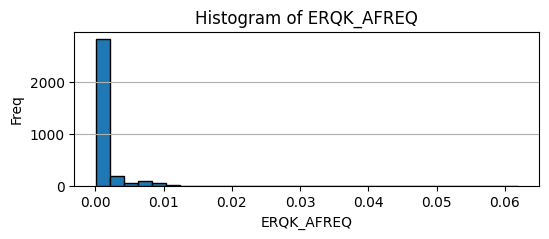

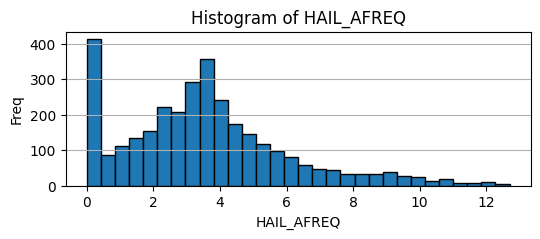

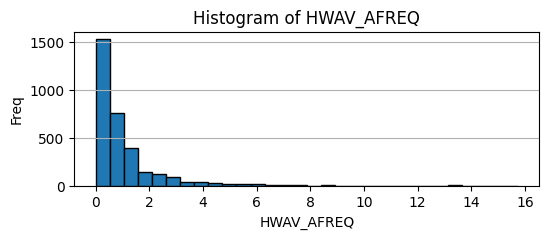

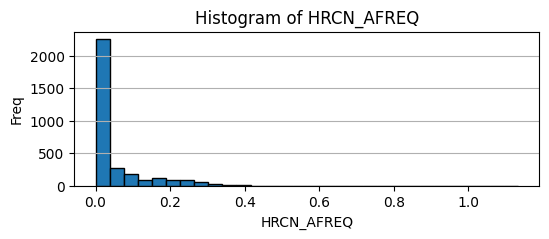

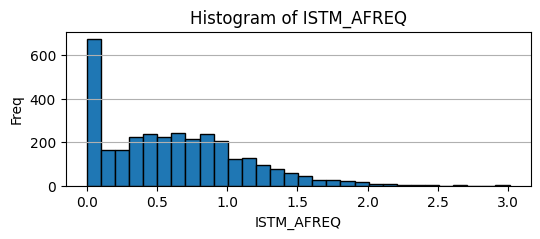

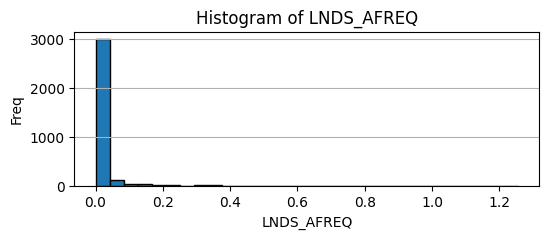

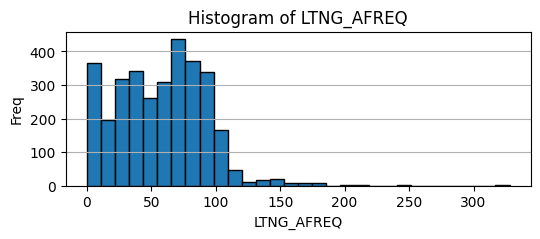

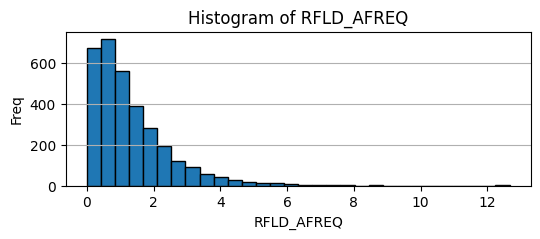

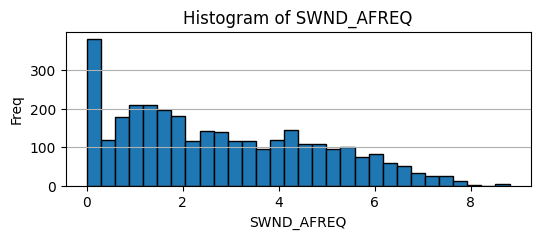

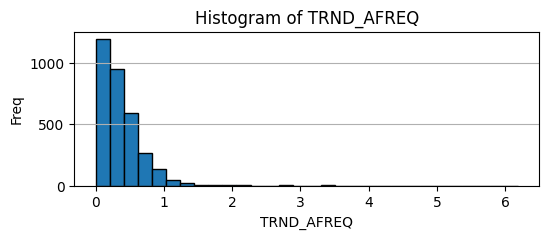

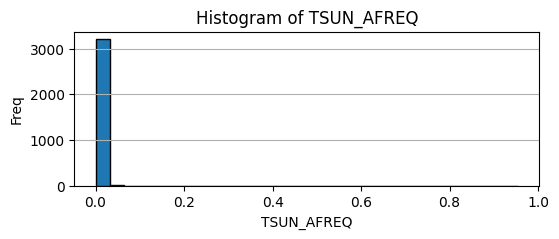

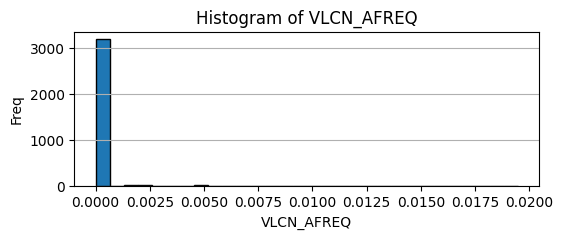

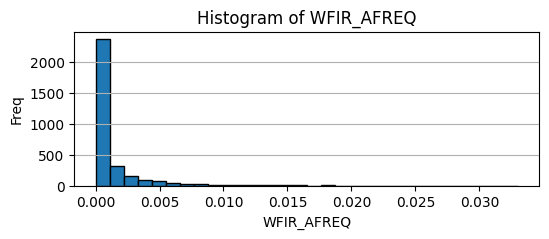

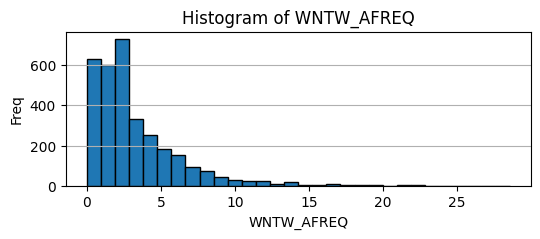

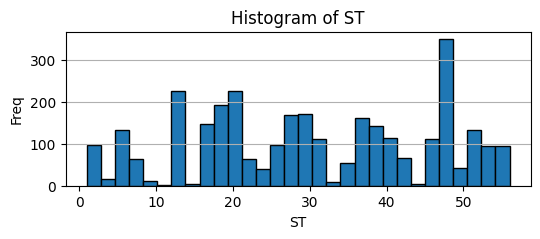

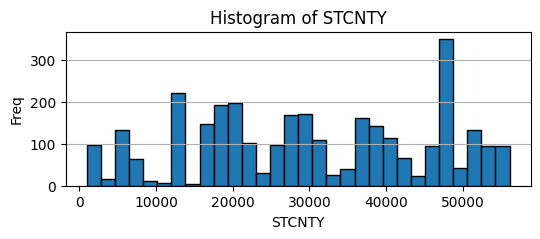

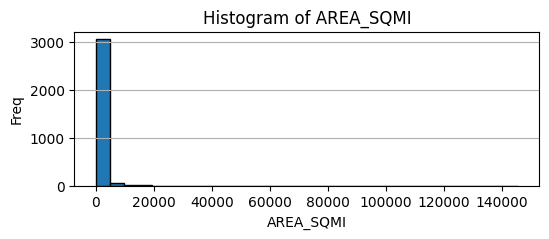

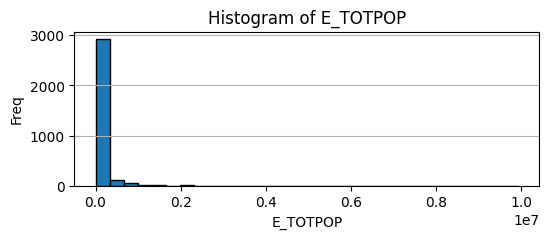

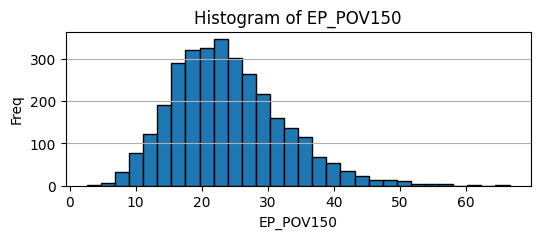

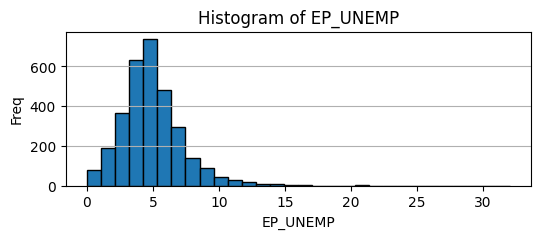

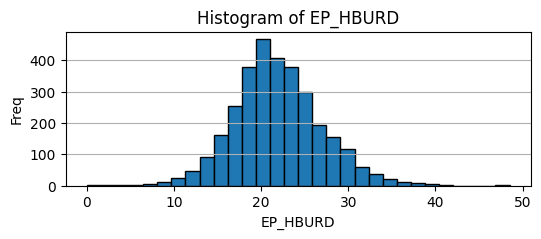

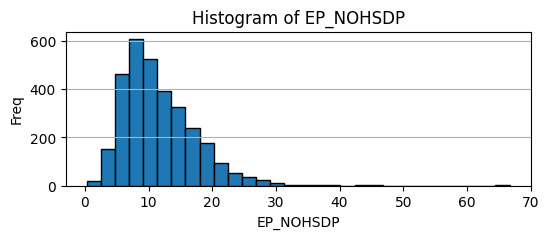

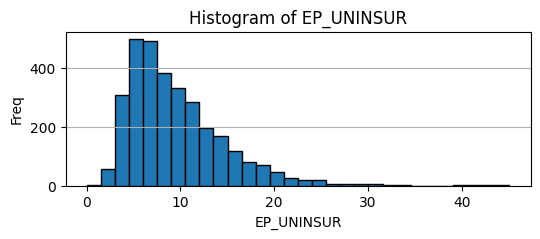

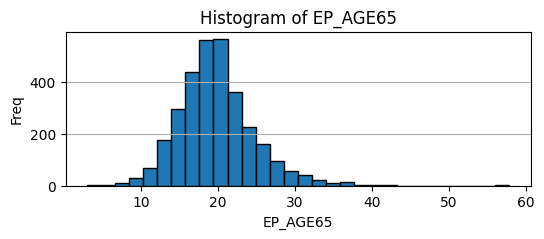

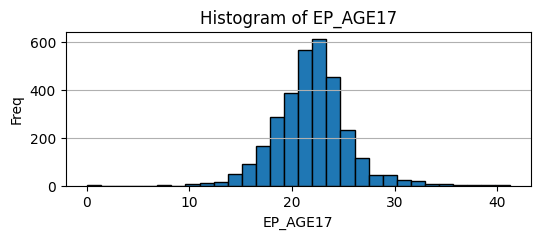

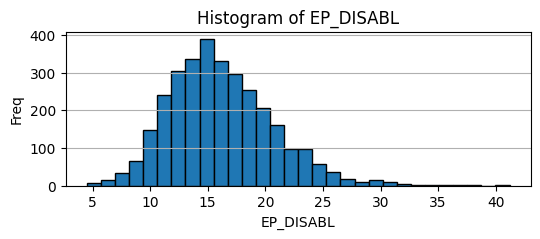

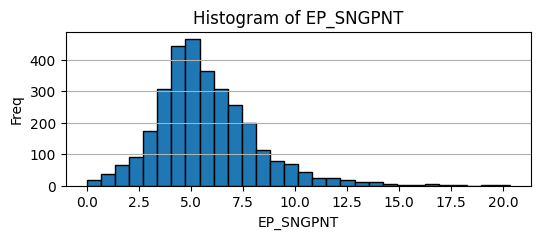

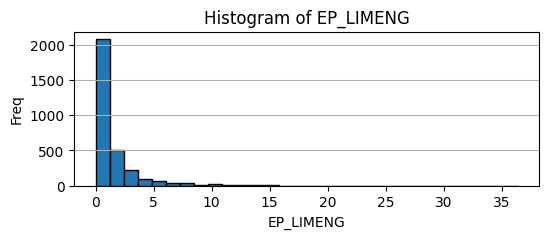

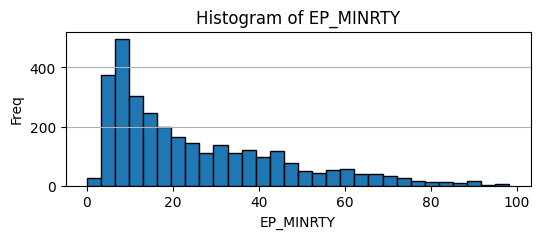

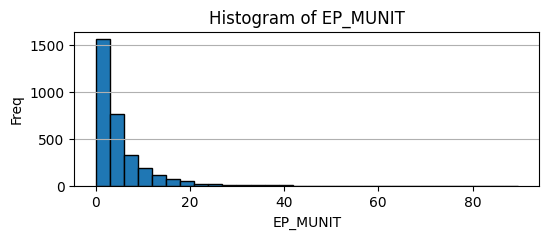

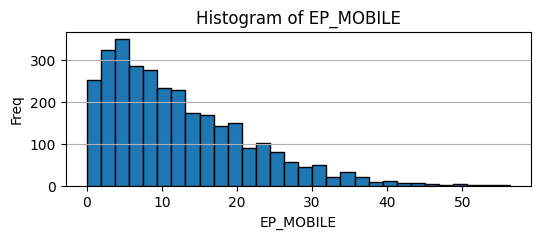

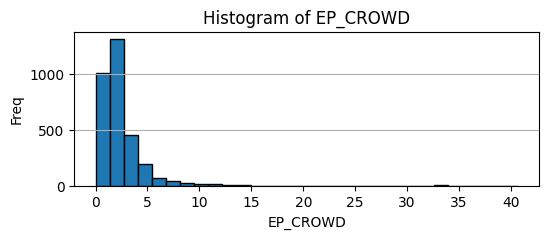

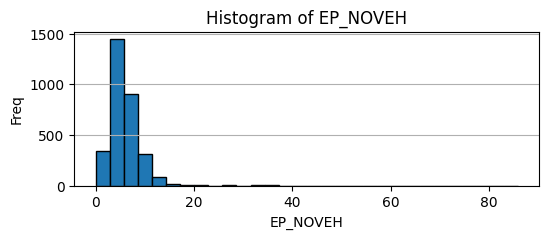

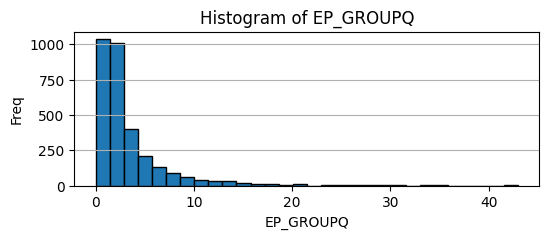

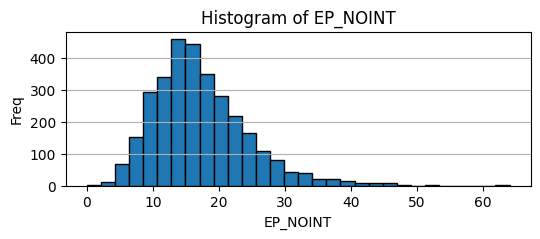

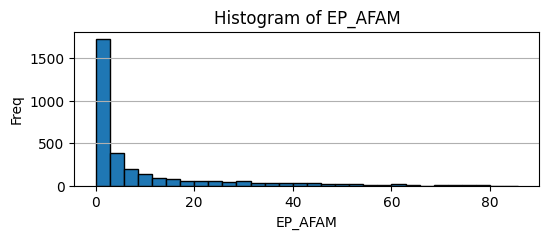

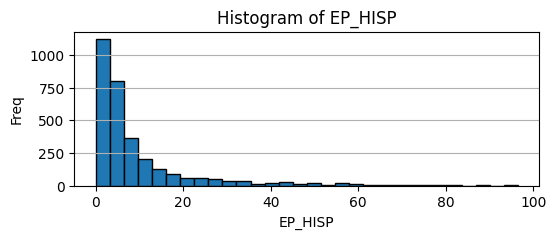

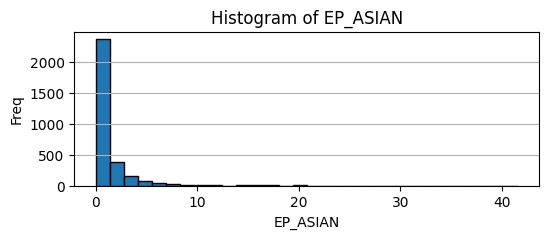

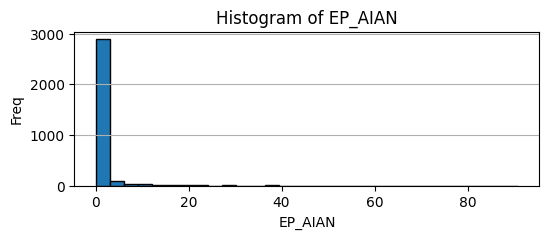

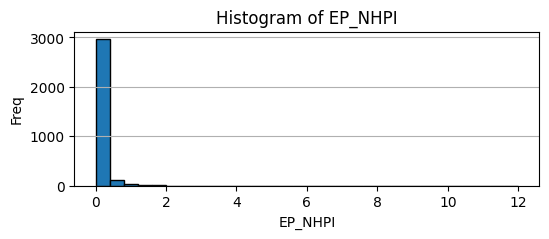

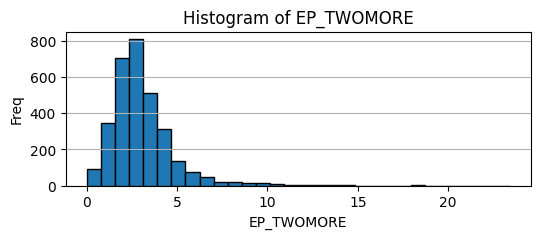

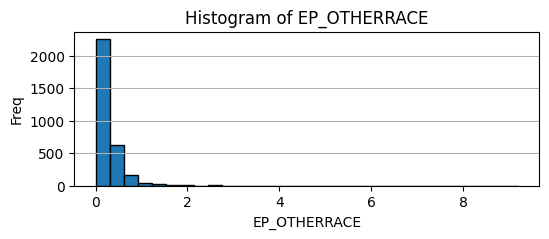

In [190]:
#import matplotlib.pyplot as plt
num_cols = df_merge.select_dtypes(include=['float64', 'int64']).columns

def hist(data, column_name):
    plt.figure(figsize=(6, 2))
    plt.hist(data[column_name].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Freq')
    plt.grid(axis='y')
    plt.show()

# Loop through each numerical column and plot the histogram
for col in num_cols:
    hist(df_merge, col)